In [13]:
path = 'COPA_Cases_-_By_Complainant_or_Subject.csv'
import pandas as pd
df = pd.read_csv(path)
df.columns = df.columns.str.lower() # convert header to lower case
#df = df.fillna("-") # replace missing values with "-"
df.info()
#df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16755 entries, 0 to 16754
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   log_no               16755 non-null  object
 1   complaint_date       16755 non-null  object
 2   assignment           16755 non-null  object
 3   case_type            5311 non-null   object
 4   current_status       5311 non-null   object
 5   current_category     5311 non-null   object
 6   finding_code         3529 non-null   object
 7   police_shooting      5311 non-null   object
 8   beat                 5311 non-null   object
 9   race_of_complainant  5311 non-null   object
 10  sex_of_complainant   5311 non-null   object
 11  age_of_complainant   5311 non-null   object
 12  complaint_hour       16755 non-null  int64 
 13  complaint_day        16755 non-null  int64 
 14  complaint_month      16755 non-null  int64 
dtypes: int64(3), object(12)
memory usage: 1.9+ MB


In [55]:
df.finding_code.unique()
#df = df.replace({'sex_of_complainant': {None:'Unknown'},
#                'race_of_complainant':{None:'Unknown'},
#                #'age_of_complainant': {None:"Unknown"}
#                })
df_b = df[df.assignment == 'BIA']
df_c = df[df.assignment == 'COPA']
df_t = df_c.copy()
df_t.index = range(5311) # reindex the data frame using index method
df_t

,log_no,complaint_date,assignment,case_type,current_status,current_category,finding_code,police_shooting,beat,race_of_complainant,sex_of_complainant,age_of_complainant,complaint_hour,complaint_day,complaint_month
0,2021-0001332,04/09/2021 06:00:26 PM,COPA,Complaint,Pending Investigation,Improper Search or Seizure | Excessive Force |...,NaN,No,0724,Black or African American,Male,30-39,18,6,4
1,2023-0003031,07/11/2023 05:47:41 PM,COPA,Complaint,Pending Investigation,Excessive Force,NaN,No,0725,"Hispanic, Latino, or Spanish Origin",Male,20-29,17,3,7
2,2019-0000894,04/21/2019 02:39:37 PM,COPA,Complaint,Closed,Improper Search or Seizure | Improper Search o...,Exonerated | Exonerated | Not Sustained | Exon...,No,0511,Black or African American,Male,40-49,14,1,4
3,2021-0002333,06/16/2021 10:45:02 AM,COPA,Complaint,Pending CPD Review,Excessive Force | Excessive Force | Excessive ...,Sustained | Not Sustained | Sustained | Unfoun...,No,0114,White,Male,20-29,10,4,6
4,2019-0003339,08/20/2019 05:37:15 PM,COPA,Complaint,Closed,Operational Violation | Abuse of Authority | A...,Exonerated | Exonerated | Exonerated | Unfounded,No,1214,Middle Eastern or North African,Male,20-29,17,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5306,2020-0000464,01/27/2020 02:19:41 PM,COPA,Complaint,Pending Investigation,Improper Search or Seizure | Improper Search o...,NaN,No,0732,Black or African American,Male,50-59,14,2,1
5307,2020-0000989,02/28/2020 04:44:13 PM,COPA,Complaint,Pending CPD Review,Operational Violation | Operational Violation ...,Sustained | Sustained | Sustained | Exonerated...,No,1135,Black or African American,Unknown,30-39,16,6,2
5308,2023-0001655,04/17/2023 12:17:08 PM,COPA,Notification,Closed,Closed-No Allegation,No Finding,No,0412,Unknown,Unknown,Unknown,12,2,4
5309,2019-0003272,08/15/2019 10:45:50 PM,COPA,Complaint,Closed,Excessive Force | Excessive Force | Operationa...,Not Sustained | Not Sustained | Unfounded,No,0823,Black or African American,Male,30-39,22,5,8


In [84]:
# view case type and current status by sex of complainants
df_t.case_type.unique()
df_t.sex_of_complainant = df.sex_of_complainant.str.lower()
df_t.pivot_table('assignment', index=['case_type', 'current_status'], columns=['sex_of_complainant'], fill_value="-", aggfunc='count')

sex_of_complainant                                    female   male  \
case_type     current_status                                          
Complaint     Closed                                   214.0  512.0   
              Pending CPD Review                         8.0   50.0   
              Pending Investigation                     95.0  277.0   
              Referred to Mediation Services Provider      -    3.0   
Miscellaneous Closed                                       -      -   
Notification  Closed                                     8.0   20.0   
              Pending CPD Review                           -      -   
              Pending Investigation                      7.0   16.0   

sex_of_complainant                                    non-binary / third gender  \
case_type     current_status                                                      
Complaint     Closed                                                        4.0   
              Pending CPD Review                                              -   
              Pending Investigation                                         1.0   
              Referred to Mediation Services Provider                         -   
Miscellaneous Closed                                                          -   
Notification  Closed                                                          -   
              Pending CPD Review                                              -   
              Pending Investigation                                           -   

sex_of_complainant                                    prefer not to say  \
case_type     current_status                                              
Complaint     Closed                                                1.0   
              Pending CPD Review                                      -   
              Pending Investigation                                   -   
              Referred to Mediation Services Provider                 -   
Miscellaneous Closed                                                  -   
Notification  Closed                                                  -   
              Pending CPD Review                                      -   
              Pending Investigation                                   -   

sex_of_complainant                                     unknown  
case_type     current_status                                    
Complaint     Closed                                    2431.0  
              Pending CPD Review                         189.0  
              Pending Investigation                     1310.0  
              Referred to Mediation Services Provider      8.0  
Miscellaneous Closed                                       1.0  
Notification  Closed                                      88.0  
              Pending CPD Review                           3.0  
              Pending Investigation                       65.0

In [85]:
# view case type and current status by age of complainants
df_t.pivot_table('assignment', index=['case_type', 'current_status'], columns=['age_of_complainant'], fill_value="-", aggfunc='count')

age_of_complainant                                      0-19  20-29  30-39  \
case_type     current_status                                                 
Complaint     Closed                                   214.0  792.0  702.0   
              Pending CPD Review                        29.0   63.0   60.0   
              Pending Investigation                    205.0  387.0  380.0   
              Referred to Mediation Services Provider      -    1.0    7.0   
Miscellaneous Closed                                       -      -      -   
Notification  Closed                                     9.0   18.0   17.0   
              Pending CPD Review                           -    1.0      -   
              Pending Investigation                      8.0   28.0   10.0   

age_of_complainant                                     40-49  50-59 60-69  \
case_type     current_status                                                
Complaint     Closed                                   357.0  165.0  52.0   
              Pending CPD Review                        25.0   14.0   2.0   
              Pending Investigation                    181.0   78.0  21.0   
              Referred to Mediation Services Provider      -    1.0   2.0   
Miscellaneous Closed                                       -      -     -   
Notification  Closed                                    14.0    9.0     -   
              Pending CPD Review                           -      -     -   
              Pending Investigation                      7.0    6.0     -   

age_of_complainant                                    70-79 80-89  90+ Unknown  
case_type     current_status                                                    
Complaint     Closed                                   10.0   1.0  1.0   868.0  
              Pending CPD Review                          -     -    -    54.0  
              Pending Investigation                     2.0     -    -   429.0  
              Referred to Mediation Services Provider     -     -    -       -  
Miscellaneous Closed                                      -     -    -     1.0  
Notification  Closed                                      -     -    -    49.0  
              Pending CPD Review                          -   1.0    -     1.0  
              Pending Investigation                       -     -    -    29.0

In [231]:
# current category and finding code
df_t.pivot_table('assignment', index=['current_category'], columns=['finding'], fill_value='-', aggfunc='count')
# the result from the pivot table is unuseable as is

In [177]:
# this code block is for learnig purpose only, redacting the current_category and finding_code block will lead to 
# data mangling (loss)
#df_t.current_category.info()
import re
df_t.current_category.str.contains('Abuse')
def clean_category (category):
    if re.search('Improper Search', category):
        return "Improper Search" # combine or Improper Search
    elif re.search('Domestic Violence', category): 
        return 'Domestic Violence' # combine all abuse of Authority
    elif re.search('Operational Violation', category):
        return "Operational Violation"
    elif re.search('Excessive Force', category):
        return 'Excessive Force'
    elif re.search('Coercion', category):
        return 'Coercion'
    elif re.search('Unnecessary Display of Weapon', category):
        return 'Unnecessary Display of Weapon'
    elif re.search('Traffic', category):
        return 'Traffic'
    elif re.search('Sexual', category):
        return 'Sexual'
    elif re.search('Firearm Discharge', category):
        return 'Firearm Discharge'
    elif re.search('Abuse of Authority', category):
        return 'Abuse of Authority'
    elif re.search('Verbal Abuse', category):
        return 'Verbal Abuse'
    elif re.search('Court Violation', category):
        return 'Court Violation'
    elif re.search('Denial of Counsel', category):
        return 'Denial of Counsel'
    elif re.search('Making a False Report', category):
        return 'Making a False Report'
    elif re.search('Incident in Custody', category):
        return 'Incident in Custody'
    elif re.search('Failure to Provide Proper Care', category):
        return 'Failure to Provide Proper Care'
    elif re.search('Motor Vehicle Incident-Fatal', category):
        return 'Motor Vehicle Incident-Fatal'
    elif re.search('Miscellaneous', category):
        return 'Miscellaneous'

    else:
        return category

df_t['current_category'] = df_t['current_category'].apply(clean_category)
#df_t = df_u.copy()


In [225]:
df_t = df_t.replace([{'finding_code': {None:"Unknown"}}])
df_t.finding_code = df_t.finding_code.fillna("Unknown")
#df_t.finding_code.value
#df_t = df_u.copy()
df_t

,log_no,complaint_date,assignment,case_type,current_status,current_category,finding_code,police_shooting,beat,race_of_complainant,sex_of_complainant,age_of_complainant,complaint_hour,complaint_day,complaint_month
0,2021-0001332,04/09/2021 06:00:26 PM,COPA,Complaint,Pending Investigation,Improper Search or Seizure | Excessive Force |...,NaN,No,0724,Black or African American,unknown,30-39,18,6,4
1,2023-0003031,07/11/2023 05:47:41 PM,COPA,Complaint,Pending Investigation,Excessive Force,NaN,No,0725,"Hispanic, Latino, or Spanish Origin",unknown,20-29,17,3,7
2,2019-0000894,04/21/2019 02:39:37 PM,COPA,Complaint,Closed,Improper Search or Seizure | Improper Search o...,Exonerated | Exonerated | Not Sustained | Exon...,No,0511,Black or African American,unknown,40-49,14,1,4
3,2021-0002333,06/16/2021 10:45:02 AM,COPA,Complaint,Pending CPD Review,Excessive Force | Excessive Force | Excessive ...,Sustained | Not Sustained | Sustained | Unfoun...,No,0114,White,unknown,20-29,10,4,6
4,2019-0003339,08/20/2019 05:37:15 PM,COPA,Complaint,Closed,Operational Violation | Abuse of Authority | A...,Exonerated | Exonerated | Exonerated | Unfounded,No,1214,Middle Eastern or North African,male,20-29,17,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5306,2020-0000464,01/27/2020 02:19:41 PM,COPA,Complaint,Pending Investigation,Improper Search or Seizure | Improper Search o...,NaN,No,0732,Black or African American,unknown,50-59,14,2,1
5307,2020-0000989,02/28/2020 04:44:13 PM,COPA,Complaint,Pending CPD Review,Operational Violation | Operational Violation ...,Sustained | Sustained | Sustained | Exonerated...,No,1135,Black or African American,unknown,30-39,16,6,2
5308,2023-0001655,04/17/2023 12:17:08 PM,COPA,Notification,Closed,Closed-No Allegation,No Finding,No,0412,Unknown,unknown,Unknown,12,2,4
5309,2019-0003272,08/15/2019 10:45:50 PM,COPA,Complaint,Closed,Excessive Force | Excessive Force | Operationa...,Not Sustained | Not Sustained | Unfounded,No,0823,Black or African American,unknown,30-39,22,5,8


In [260]:
# code block is same as above for learning only
import re
def clean_finding (finding):
    if re.search(' Exonerated ', finding):
        return 'Exonerated'
    else:
        return finding

In [234]:

#df_t['finding_code'] = df_t['finding_code'].apply(clean_finding)
pd.set_option('display.max_colwidth', 0)
df_t.iloc[2:3,5:7] # show values for row 2 and columns 5 and 6

,current_category,finding_code
2,Improper Search or Seizure | Improper Search or Seizure | Coercion | Improper Search or Seizure | Abuse of Authority | Improper Search or Seizure | Improper Search or Seizure | Abuse of Authority,Exonerated | Exonerated | Not Sustained | Exonerated | Not Sustained | Exonerated | Exonerated | Not Sustained


In [318]:
# check for number of complaint per day on average
#df_t.complaint_date.value_counts()
#df_t.complaint_date.describe()
from datetime import datetime as dt
dv = df_t.iloc[0:1,1:2]
dd = pd.to_datetime(dv.iloc[:,0], format='%d/%m/%Y %I:%M:%S %p') #format for converting string to date. Use I in place of H for 24hr
dd.dt.normalize() # to get the date part
dd.dt.time # to get the time part
dd.dt.hour # to get the hour ( get .minute | .second)


0    18
Name: complaint_date, dtype: int64

In [353]:
# create new columns for date and hour of complaint
dc = df_t.iloc[:,1:2]
df_t['c_date'] = pd.to_datetime(dc.iloc[:,0], format='%m/%d/%Y %I:%M:%S %p').dt.normalize()
df_t['c_hour'] = pd.to_datetime(dc.iloc[:,0], format='%m/%d/%Y %I:%M:%S %p').dt.hour
df_t[:5]
# complaint in a 24-hour period by sex of complainant
df_t.pivot_table('assignment', index='c_hour', columns='sex_of_complainant', fill_value="-", aggfunc='count')

sex_of_complainant,female,male,non-binary / third gender,prefer not to say,unknown
c_hour,,,,,
0,7.0,21.0,-,-,103.0
1,5.0,24.0,-,-,75.0
2,8.0,16.0,-,-,85.0
3,5.0,13.0,-,-,72.0
4,4.0,13.0,-,-,39.0
5,4.0,5.0,-,-,39.0
6,3.0,7.0,-,-,29.0
7,2.0,9.0,-,-,43.0
8,4.0,17.0,-,-,52.0


<AxesSubplot:xlabel='c_hour', ylabel='sex_of_complainant'>

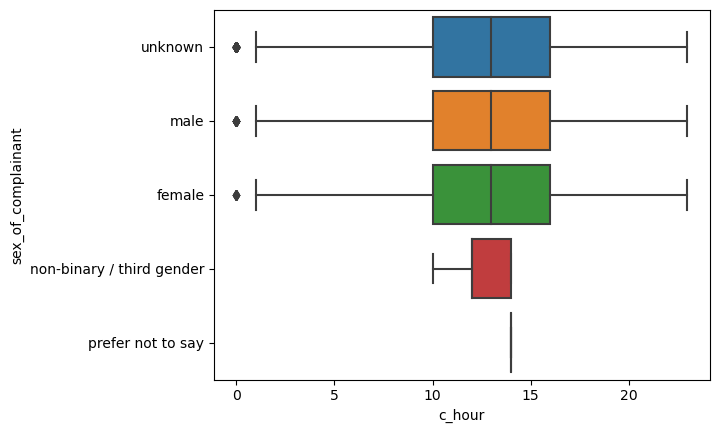

In [356]:
import seaborn as sb
sb.boxplot(x = 'c_hour', y='sex_of_complainant', data=df_t)


In [402]:
# Visualization group gender complaint by hour of the day
c_sex = df_t.groupby(['c_hour','sex_of_complainant'])
grp_c_sex = c_sex.size().fillna("-")
grp_c_sex.name = 'count'
grp_c_sex = grp_c_sex.reset_index()
grp_c_sex

,c_hour,sex_of_complainant,count
0,0,female,7
1,0,male,21
2,0,unknown,103
3,1,female,5
4,1,male,24
...,...,...,...
71,22,male,22
72,22,unknown,126
73,23,female,10
74,23,male,25


<AxesSubplot:xlabel='c_hour', ylabel='count'>

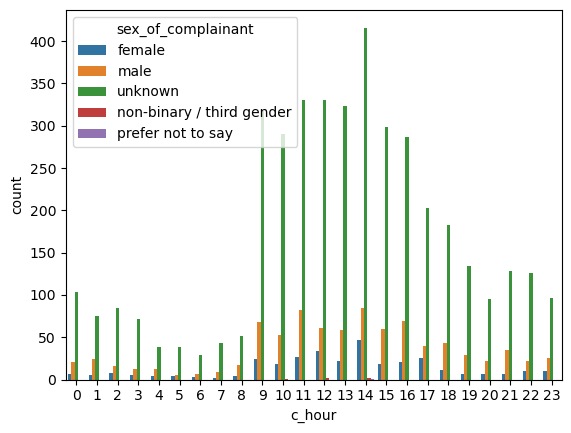

In [404]:
sb.barplot(x='c_hour', y='count', hue='sex_of_complainant', data=grp_c_sex)

In [428]:
# Visualization group gender complaint by date of the year
c_date = df_t.groupby(['c_date','sex_of_complainant'])
grp_c_date = c_date.size().fillna("-")
grp_c_date.name = 'count'
grp_c_date = grp_c_date.reset_index()
grp_c_date['month'] = pd.to_datetime(grp_c_date.iloc[:,0], format='%m/%d/%Y %I:%M:%S %p').dt.month
#grp_c_date.groupby(['month']).size()
grp_c_date

,c_date,sex_of_complainant,count,month
0,2019-02-11,male,2,2
1,2019-02-11,unknown,5,2
2,2019-02-12,unknown,1,2
3,2019-02-13,female,1,2
4,2019-02-13,male,1,2
...,...,...,...,...
2151,2023-07-09,unknown,4,7
2152,2023-07-10,unknown,1,7
2153,2023-07-11,male,1,7
2154,2023-07-11,unknown,5,7


<AxesSubplot:xlabel='month', ylabel='count'>

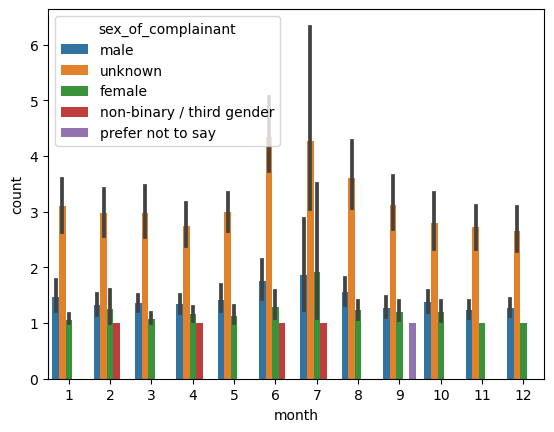

In [429]:
sb.barplot(x='month', y='count', hue='sex_of_complainant', data=grp_c_date)